<a href="https://colab.research.google.com/github/jorgelum/Diversos/blob/master/RedesNeurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Redes Neurais com Pytorch**

## Bibliotecas

In [ ]:
!pip install basedosdados

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing installation: tomlkit 0.13.3
    Uninstalling tomlkit-0.13.3:
      Successfully uninstalled tomlkit-0.13.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio 5.46.0 requires tomlkit<0.14.0,>=0.12.0, but you have tomlkit 0.11.8 which is incompatible.


In [ ]:
import pandas as pd
import basedosdados as bd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import torch
import torch.nn as nn

## Exemplo genérico

In [ ]:
# Dados
x = np.linspace(0,10,100)
y = 0.8*x + np.random.normal(loc=0, scale=1, size=x.shape)   # Adicionando aleatoridade

# Separando dados de treino e teste (80%/20%)
train = int(0.8*len(y))
X_train = x[:train]
y_train = y[:train]
X_test = x[train:]
y_test = y[train:]

# Converção para tensores
X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(y_train, dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(y_test, dtype=torch.float32)



In [ ]:
# Modelo
class Modelo(nn.Module):
    def __init__(self):
        super().__init__()
        self.seq = nn.Sequential(nn.Linear(1,64), # 1° Camada
                                 nn.ReLU(),       # Ativação
                                 nn.Linear(64,64), # 2° Camada)
                                 nn.ReLU(),       # Ativação
                                 nn.Linear(64,32), # 3° Camada
                                 nn.ReLU(),       # Ativação
                                 nn.Linear(32,1)) # Camada de saída

    def forward(self,x):
        return self.seq(x)

# Instanciar modelo, função de perda e otimizador
model = Modelo()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)



In [ ]:
# Listas para armazenar as perdas durante o treinamento
train_losses = []
test_losses = []

# Treinamento
model.train()  # Colocar o modelo em modo de treino
for epoch in range(1001):
    # Forward pass
    output = model(X_train)
    loss = criterion(output.squeeze(), y_train)

    # Backward pass e otimização
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Calcular perda no conjunto de teste (sem afetar os gradientes)
    model.eval()  # Colocar o modelo em modo de avaliação
    with torch.no_grad():
        test_output = model(X_test)
        test_loss = criterion(test_output.squeeze(), y_test)

    model.train()  # Voltar para modo de treino

    # Armazenar as perdas
    train_losses.append(loss.item())
    test_losses.append(test_loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}")

# Avaliação final do modelo
model.eval()  # Colocar o modelo em modo de avaliação
with torch.no_grad():
    # Previsões para todos os dados
    y_pred_train = model(X_train).squeeze().numpy()
    y_pred_test = model(X_test).squeeze().numpy()

    # Calcular métricas finais
    final_train_loss = criterion(torch.tensor(y_pred_train), y_train).item()
    final_test_loss = criterion(torch.tensor(y_pred_test), y_test).item()

    print(f"\n--- Resultados Finais ---")
    print(f"Perda final no treino: {final_train_loss:.4f}")
    print(f"Perda final no teste: {final_test_loss:.4f}")



Epoch 0, Train Loss: 14.5215, Test Loss: 50.3098
Epoch 100, Train Loss: 1.0717, Test Loss: 0.6124
Epoch 200, Train Loss: 1.0669, Test Loss: 0.6115
Epoch 300, Train Loss: 1.0610, Test Loss: 0.6130
Epoch 400, Train Loss: 1.0548, Test Loss: 0.6161
Epoch 500, Train Loss: 1.0495, Test Loss: 0.6184
Epoch 600, Train Loss: 1.0417, Test Loss: 0.6267
Epoch 700, Train Loss: 1.0300, Test Loss: 0.6528
Epoch 800, Train Loss: 1.0085, Test Loss: 0.7493
Epoch 900, Train Loss: 0.9708, Test Loss: 1.1242
Epoch 1000, Train Loss: 0.9234, Test Loss: 1.7535

--- Resultados Finais ---
Perda final no treino: 0.9236
Perda final no teste: 1.7535


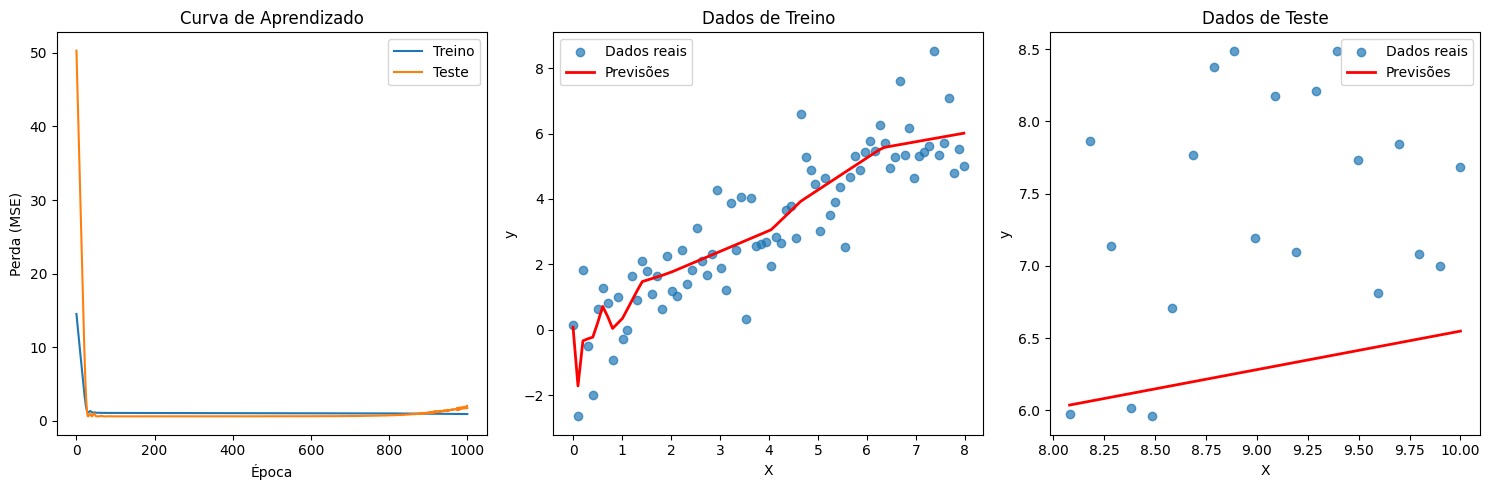

In [ ]:
# Plotar resultados
plt.figure(figsize=(15, 5))

# Subplot 1: Curva de perda durante o treinamento
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Treino')
plt.plot(test_losses, label='Teste')
plt.xlabel('Época')
plt.ylabel('Perda (MSE)')
plt.title('Curva de Aprendizado')
plt.legend()
#plt.grid(True)

# Subplot 2: Dados de treino e previsões
plt.subplot(1, 3, 2)
plt.scatter(X_train.squeeze().numpy(), y_train.numpy(), alpha=0.7, label='Dados reais')
plt.plot(X_train.squeeze().numpy(), y_pred_train, 'r-', linewidth=2, label='Previsões')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Dados de Treino')
plt.legend()
#plt.grid(True)

# Subplot 3: Dados de teste e previsões
plt.subplot(1, 3, 3)
plt.scatter(X_test.squeeze().numpy(), y_test.numpy(), alpha=0.7, label='Dados reais')
plt.plot(X_test.squeeze().numpy(), y_pred_test, 'r-', linewidth=2, label='Previsões')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Dados de Teste')
plt.legend()
#plt.grid(True)

plt.tight_layout()
plt.show()



## Dados

In [ ]:
dados_brutos = bd.read_sql(
    '''
    SELECT *
    FROM
      `basedosdados.br_ana_reservatorios.sin` AS dados
    WHERE
      dados.nome_reservatorio = 'BILLINGS' AND dados.data  >= '2018-01-01'
    ''',
    billing_project_id='persuasive-yeti-429718-j7'
)

Downloading: 100%|██████████|


In [ ]:
df = dados_brutos
df.head()

,data,id_reservatorio,nome_reservatorio,cota,afluencia,defluencia,vazao_vertida,vazao_turbinada,vazao_natural,proporcao_volume_util,vazao_incremental
0,2018-01-01,19036,BILLINGS,744.64,12.89,24.0,0.0,NaN,21.72,81.00,21.28
1,2018-01-02,19036,BILLINGS,744.64,15.00,15.0,0.0,NaN,16.21,81.00,23.37
2,2018-01-03,19036,BILLINGS,744.65,27.11,16.0,0.0,NaN,13.77,81.10,35.47
3,2018-01-04,19036,BILLINGS,744.66,26.23,15.0,0.0,NaN,13.43,81.20,28.57
4,2018-01-05,19036,BILLINGS,744.67,26.11,15.0,0.0,NaN,16.66,81.29,28.44


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data                   1471 non-null   dbdate 
 1   id_reservatorio        1471 non-null   object 
 2   nome_reservatorio      1471 non-null   object 
 3   cota                   1471 non-null   float64
 4   afluencia              1471 non-null   float64
 5   defluencia             1471 non-null   float64
 6   vazao_vertida          1471 non-null   float64
 7   vazao_turbinada        0 non-null      float64
 8   vazao_natural          1471 non-null   float64
 9   proporcao_volume_util  1471 non-null   float64
 10  vazao_incremental      434 non-null    float64
dtypes: dbdate(1), float64(8), object(2)
memory usage: 126.5+ KB


In [ ]:
df.isna().sum()/df.shape[0]*100

,0
data,0.000000
id_reservatorio,0.000000
nome_reservatorio,0.000000
cota,0.000000
afluencia,0.000000
defluencia,0.000000
vazao_vertida,0.000000
vazao_turbinada,100.000000
vazao_natural,0.000000
proporcao_volume_util,0.000000


## Análise Exploratória

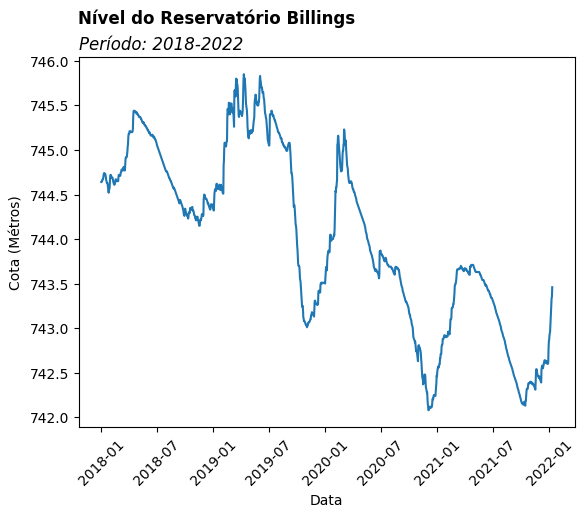

In [ ]:
plt.plot(df['data'], df['cota'])

plt.suptitle('Nível do Reservatório Billings',fontweight='bold',x = 0.34)
plt.title('Período: 2018-2022',fontstyle='italic',loc = 'left')
plt.xlabel('Data')
plt.xticks(rotation =  45)
plt.ylabel('Cota (Métros)')
plt.show()

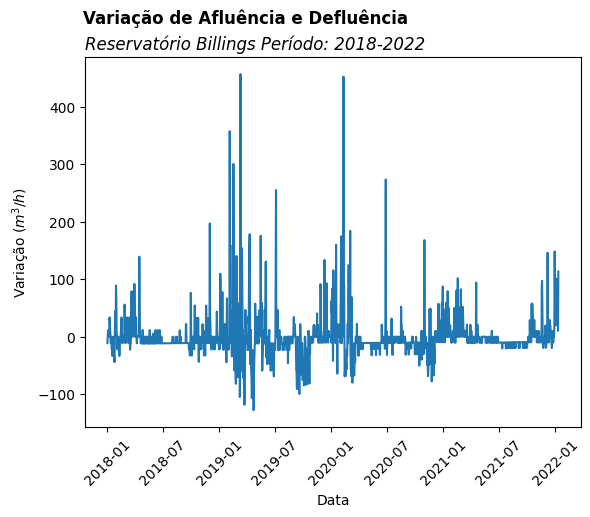

In [ ]:
df['delta'] = df['afluencia'] - df['defluencia']
plt.plot(df['data'], df['delta'])

plt.suptitle('Variação de Afluência e Defluência ',fontweight='bold',x = 0.38)
plt.title('Reservatório Billings Período: 2018-2022',fontstyle='italic',loc = 'left')
plt.xlabel('Data')
plt.xticks(rotation =  45)
plt.ylabel(r'Variação ($m^3/ h$)')
plt.show()

##  Modelo

In [ ]:
seq_length = 60

# Preparar os dados para treino - versão para múltiplas colunas
def create_sequences_multivariate(data, features_cols, target_col, seq_length):
    """
    Cria sequências para dados multivariados

    Args:
        data: DataFrame do pandas
        features_cols: lista com nomes das colunas de features
        target_col: nome da coluna alvo
        seq_length: comprimento da sequência
    """
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        # Features: múltiplas colunas
        x = data[features_cols].iloc[i:i+seq_length].values
        # Target: uma coluna específica
        y = data[target_col].iloc[i+seq_length]
        xs.append(x)
        ys.append(y)
    return torch.tensor(xs, dtype=torch.float32), torch.tensor(ys, dtype=torch.float32)

# Definir quais colunas usar como features e qual é o target
feature_columns = ['delta']
target_column = 'cota'

# Criar sequências
X, y = create_sequences_multivariate(df, feature_columns, target_column, seq_length)

# Modelo GRU modificado para múltiplas features
class GRUNetMultivariate(nn.Module):
    def __init__(self, input_size=3, hidden_size=32, num_layers=1):
        super(GRUNetMultivariate, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc1 = nn.Linear(hidden_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.gru(x)
        out = out[:, -1, :]  # pegar a saída do último passo de tempo
        out = self.fc1(out)
        out = self.fc2(out)
        return out

# Instanciar o modelo com o número correto de features de entrada
model = GRUNetMultivariate(input_size=len(feature_columns))
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Treinamento
for epoch in range(501):
    output = model(X)
    loss = criterion(output.squeeze(), y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Função para fazer previsões com novos dados
def predict_multivariate(model, data, features_cols, seq_length):
    """
    Faz previsões com dados multivariados
    """
    if len(data) < seq_length:
        raise ValueError(f"Dados precisam ter pelo menos {seq_length} observações")

    # Pegar a última sequência completa
    last_sequence = data[features_cols].iloc[-seq_length:].values
    last_sequence = torch.tensor(last_sequence, dtype=torch.float32).unsqueeze(0)

    with torch.no_grad():
        prediction = model(last_sequence)

    return prediction.item()

# Exemplo de uso da função de previsão
prediction = predict_multivariate(model, df, feature_columns, seq_length)
print(f"Previsão para o próximo passo: {prediction:.4f}")

Epoch 0, Loss: 553636.5000
Epoch 100, Loss: 376.8456
Epoch 200, Loss: 1.0353
Epoch 300, Loss: 1.0330
Epoch 400, Loss: 1.0330
Epoch 500, Loss: 1.0329
Previsão para o próximo passo: 743.9873
